In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit

# Load the time series data
data = pd.read_csv("cleaned_data.csv")

# Split the data into features and target
X = data.drop("Total deaths", axis=1)
y = data["Total deaths"]

# Initialize the time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Initialize the random forest model
rf = RandomForestRegressor(n_estimators=100)



FileNotFoundError: ignored

In [ ]:
# Train the model using cross-validation
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
   

In [ ]:
  rf.fit(X_train, y_train)
    
    

In [ ]:
# Evaluate the model on the test set
test_pred = rf.predict(X_test)
score = rf.score(X_test, y_test)
print("Test score:", score)

In [ ]:
#ARIMA

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
# Load data
data = pd.read_csv("cleaned_data.csv")

# Fit ARIMA model
model = ARIMA(data['Total deaths'].values, order=(1,1,2))
model_fit = model.fit()

print(model_fit.summary())
# Make predictions
#forecast = model_fit.forecast(steps=forecast_steps)[0]

FileNotFoundError: ignored

In [ ]:
#ETS

In [14]:
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import plotly.express as px
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter('ignore')


# Load data

df= pd.read_csv("cleaned_data.csv")


train, test = train_test_split(df, test_size=0.2)

#train =df[1:6552].values
#test=df[6553:7272].values
#train= pd.read_csv("cleaned_data.csv")
#test=pd.read_csv("cleaned_data.csv")

# Fit Exponential Smoothing model
model = ExponentialSmoothing(train['Total_deaths'].values)
model_fit = model.fit()


# Make predictions
#forecast = model_fit.forecast(steps=forecast_steps)

# New Section

In [15]:
print(model_fit.summary())

                         ExponentialSmoothing Model Results                        
Dep. Variable:                    endog   No. Observations:                  133060
Model:             ExponentialSmoothing   SSE                 10904513411540554.000
Optimized:                         True   AIC                           3343721.663
Trend:                             None   BIC                           3343741.260
Seasonal:                          None   AICC                          3343721.664
Seasonal Periods:                  None   Date:                    Thu, 09 Feb 2023
Box-Cox:                          False   Time:                            05:21:34
Box-Cox Coeff.:                    None                                            
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.0050000                alpha                 True
initial

In [16]:
train.head()

,Continent,Location,Date,Total_Cases,New_Cases,New cases smoothed,Total_deaths,New deaths,new deaths smoothed,total cases per million,...,median age,aged 65 older,aged 70 older,extreme poverty,cardiovasc death rate,diabetes prevalence,female smokers,male smokers,hospital beds per thousand,life expectancy
45220,North America,El Salvador,2020-11-27,38405,177,165.000,1102,4,5.429,5891.693,...,27.6,8.273,5.417,2.2,167.295,8.87,2.5,18.8,1,73.32
136883,Oceania,Solomon Islands,2021-02-26,18,0,0.000,1,0,0.000,25.568,...,20.8,3.507,2.043,25.1,459.780,18.68,1.9,24.7,1,73.00
36300,Europe,Croatia,2020-06-27,2624,85,46.429,107,0,0.000,642.876,...,44.0,19.724,13.053,0.7,253.782,5.59,34.3,39.9,5,78.49
98781,North America,Mexico,2022-02-20,5413425,5714,18510.429,315688,163,427.286,41557.905,...,29.3,6.857,4.321,2.5,152.783,13.06,6.9,21.4,1,75.05
132489,Europe,Serbia,2021-06-09,714252,198,180.429,6938,8,8.143,103943.406,...,41.2,17.366,3.053,0.2,439.415,10.08,37.7,40.2,5,76.00


In [17]:
df = train.fillna('NA').groupby(['Continent','Location','Date'])['Total_Cases'].sum() \
                          .groupby(['Continent','Location']).max().sort_values() \
                          .groupby(['Continent']).sum().sort_values(ascending = False)

top10 = pd.DataFrame(df).head(10)
top10

,Total_Cases
Continent,
Africa,1457546576
Europe,161214922
Asia,120630476
North America,93397314
South America,54615670
Oceania,3831677


In [18]:
train.sample(6)

,Continent,Location,Date,Total_Cases,New_Cases,New cases smoothed,Total_deaths,New deaths,new deaths smoothed,total cases per million,...,median age,aged 65 older,aged 70 older,extreme poverty,cardiovasc death rate,diabetes prevalence,female smokers,male smokers,hospital beds per thousand,life expectancy
68170,Asia,Hong Kong,2022-01-27,13790,164,99.143,213,0,0.000,1825.813,...,44.8,16.303,10.158,0.2,152.783,8.33,1.9,24.7,0,84.86
83818,Europe,Latvia,2020-09-25,1625,31,18.143,36,0,0.000,870.411,...,43.9,19.754,14.136,0.7,350.060,4.91,25.6,51.0,5,75.29
1550,Europe,Albania,2020-04-22,634,25,20.000,27,1,0.286,220.680,...,38.0,13.188,8.643,1.1,304.195,10.08,7.1,51.2,2,78.57
112331,Europe,North Macedonia,2020-10-30,30488,930,642.429,982,5,14.143,14638.964,...,39.1,13.260,8.160,5.0,322.688,10.08,1.9,24.7,4,75.80
157741,North America,United States,2021-06-24,33704204,14315,11904.714,602718,340,316.286,101239.645,...,38.3,15.413,9.732,1.2,151.089,10.79,19.1,24.6,2,78.86
14969,Europe,Belgium,2020-07-19,63706,0,142.714,9800,0,2.571,5476.631,...,41.8,18.571,12.849,0.2,114.898,4.29,25.1,31.4,5,81.63


In [19]:
test.sample(6)

,Continent,Location,Date,Total_Cases,New_Cases,New cases smoothed,Total_deaths,New deaths,new deaths smoothed,total cases per million,...,median age,aged 65 older,aged 70 older,extreme poverty,cardiovasc death rate,diabetes prevalence,female smokers,male smokers,hospital beds per thousand,life expectancy
39150,Europe,Czechia,2020-04-29,7579,75,63.857,227,0,2.714,706.696,...,43.3,19.027,11.580,0.2,227.485,6.82,30.5,38.3,6,79.38
33878,Africa,Congo,2020-08-28,3979,0,18.429,78,0,0.143,703.374,...,19.0,3.402,2.063,37.0,344.094,7.20,1.7,52.3,0,64.57
87794,Europe,Liechtenstein,2021-10-17,3584,0,2.429,60,0,0.286,93689.549,...,32.4,6.933,3.053,0.2,152.783,7.77,1.9,24.7,2,82.49
158706,Africa,Upper middle income,2022-01-01,86502914,147312,151487.286,2265120,1569,1869.571,34412.957,...,32.4,6.933,3.053,0.2,152.783,2.42,1.9,24.7,0,76.88
42667,North America,Dominica,2021-12-17,6286,0,7.571,42,0,0.000,87097.489,...,32.4,6.933,3.053,0.2,227.376,11.62,1.9,24.7,3,75.00
158914,South America,Uruguay,2020-08-04,1300,9,11.714,37,1,0.286,373.011,...,35.6,14.655,10.361,0.1,160.708,6.93,14.0,19.9,2,77.91


In [20]:



df = train.fillna('NA').groupby(['Continent','Location','Date'])['Total_Cases'].sum() \
                          .groupby(['Continent','Location']).max().sort_values() \
                          .groupby(['Continent']).sum().sort_values(ascending = False)

top10 = pd.DataFrame(df).head(10)
top10

,Total_Cases
Continent,
Africa,1457546576
Europe,161214922
Asia,120630476
North America,93397314
South America,54615670
Oceania,3831677


In [21]:
fig = px.bar(top10, x=top10.index, y='Total_Cases', labels={'x':'Continent'},
             color="Total_Cases", color_continuous_scale=px.colors.sequential.Brwnyl)
fig.update_layout(title_text='Total COVID-19 cases by Continent')
fig.show()

From the above graph, we can say that Africa has most Total cases and followed by Europe. The virus has began at China but virus is showing a greater impact on Africa and Europe and Asia

In [22]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Continent','Date'])['Total_Cases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Continent'] == 'Africa') &(df_by_date.Date >= '2020-03-01')].sort_values('Total_Cases',ascending = False), 
             x='Date', y='Total_Cases', color="Total_Cases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Total COVID-19 cases per day in Africa')
fig.show()

In [23]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Continent','Date'])['Total_Cases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Continent'] == 'Europe') &(df_by_date.Date >= '2020-03-01')].sort_values('Total_Cases',ascending = False), 
             x='Date', y='Total_Cases', color="Total_Cases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Total COVID-19 cases per day in Europe')
fig.show()

In [24]:
df=train.groupby(['Date','Continent']).agg('sum').reset_index()
df.tail(5)

,Date,Continent,Total_Cases,New_Cases,New cases smoothed,Total_deaths,New deaths,new deaths smoothed,total cases per million,new cases per million,...,median age,aged 65 older,aged 70 older,extreme poverty,cardiovasc death rate,diabetes prevalence,female smokers,male smokers,hospital beds per thousand,life expectancy
4668,2022-03-05,Asia,89736655,579779,520580.999,990238,1043,1047.430,2.845123e+06,22885.626,...,1062.0,226.300,138.110,117.5,9517.691,299.71,123.3,1221.8,78,2618.08
4669,2022-03-05,Europe,150295909,485868,520700.714,1584498,1581,1862.712,1.078377e+07,31621.461,...,1667.5,658.300,419.576,28.7,9315.760,257.56,841.2,1434.9,175,3254.90
4670,2022-03-05,North America,92111750,31762,65217.713,1367304,681,1747.144,3.598425e+06,988.351,...,908.4,234.852,134.628,45.5,5288.619,269.63,118.0,687.9,34,2134.64
4671,2022-03-05,Oceania,3771831,33378,46856.713,7728,20,42.143,7.638770e+05,6226.179,...,378.5,94.896,53.167,57.8,4067.740,177.32,95.2,367.1,16,961.18
4672,2022-03-05,South America,40590251,85549,65385.286,897798,897,630.144,6.717358e+05,1466.171,...,242.3,59.945,34.966,20.5,1505.733,56.96,58.6,184.0,8,605.28


In [ ]:
###Time Evaluation

In [ ]:
df.head()

,Date,Continent,Total_Cases,New_Cases,New cases smoothed,Total_deaths,New deaths,new deaths smoothed,total cases per million,new cases per million,...,median age,aged 65 older,aged 70 older,extreme poverty,cardiovasc death rate,diabetes prevalence,female smokers,male smokers,hospital beds per thousand,life expectancy
0,2020-01-01,South America,1,0,0.0,1,0,0.0,33251.232,0.0,...,31.9,11.198,7.441,0.6,191.032,5.5,16.2,27.7,5.0,76.67
1,2020-01-02,South America,1,0,0.0,1,0,0.0,33251.232,0.0,...,31.9,11.198,7.441,0.6,191.032,5.5,16.2,27.7,5.0,76.67
2,2020-01-03,South America,1,0,0.0,1,0,0.0,33251.232,0.0,...,31.9,11.198,7.441,0.6,191.032,5.5,16.2,27.7,5.0,76.67
3,2020-01-04,South America,1,0,0.0,1,0,0.0,33251.232,0.0,...,31.9,11.198,7.441,0.6,191.032,5.5,16.2,27.7,5.0,76.67
4,2020-01-05,South America,1,0,0.0,1,0,0.0,33251.232,0.0,...,31.9,11.198,7.441,0.6,191.032,5.5,16.2,27.7,5.0,76.67


In [25]:
df=train.groupby(['Date','Continent']).agg('sum').reset_index()
df.tail(5)

,Date,Continent,Total_Cases,New_Cases,New cases smoothed,Total_deaths,New deaths,new deaths smoothed,total cases per million,new cases per million,...,median age,aged 65 older,aged 70 older,extreme poverty,cardiovasc death rate,diabetes prevalence,female smokers,male smokers,hospital beds per thousand,life expectancy
4668,2022-03-05,Asia,89736655,579779,520580.999,990238,1043,1047.430,2.845123e+06,22885.626,...,1062.0,226.300,138.110,117.5,9517.691,299.71,123.3,1221.8,78,2618.08
4669,2022-03-05,Europe,150295909,485868,520700.714,1584498,1581,1862.712,1.078377e+07,31621.461,...,1667.5,658.300,419.576,28.7,9315.760,257.56,841.2,1434.9,175,3254.90
4670,2022-03-05,North America,92111750,31762,65217.713,1367304,681,1747.144,3.598425e+06,988.351,...,908.4,234.852,134.628,45.5,5288.619,269.63,118.0,687.9,34,2134.64
4671,2022-03-05,Oceania,3771831,33378,46856.713,7728,20,42.143,7.638770e+05,6226.179,...,378.5,94.896,53.167,57.8,4067.740,177.32,95.2,367.1,16,961.18
4672,2022-03-05,South America,40590251,85549,65385.286,897798,897,630.144,6.717358e+05,1466.171,...,242.3,59.945,34.966,20.5,1505.733,56.96,58.6,184.0,8,605.28


In [26]:
def pltCountry_cases(Total_Cases,*argv):
    f, ax=plt.subplots(figsize=(16,5))
    labels=argv
    for a in argv: 
        country=df.loc[(df['Continent']==a)]
        plt.plot(country['Date'],country['Total_Cases'],linewidth=3)
        plt.xticks(rotation=40)
        plt.legend(labels)
        ax.set(title='Evolution of the number of cases' )

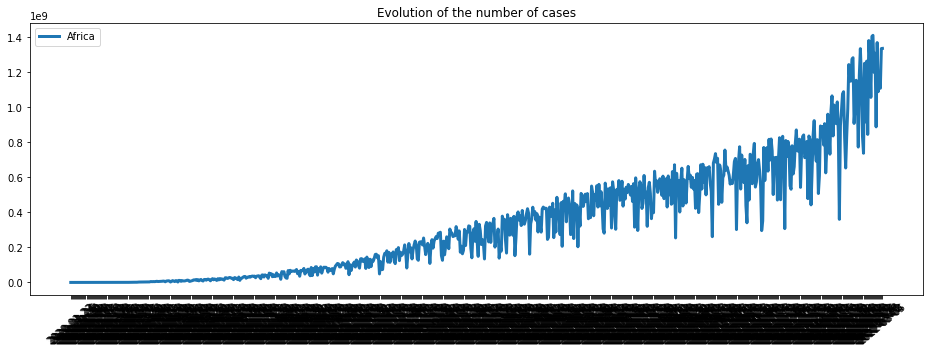

In [27]:
pltCountry_cases('Total_Cases','Africa')


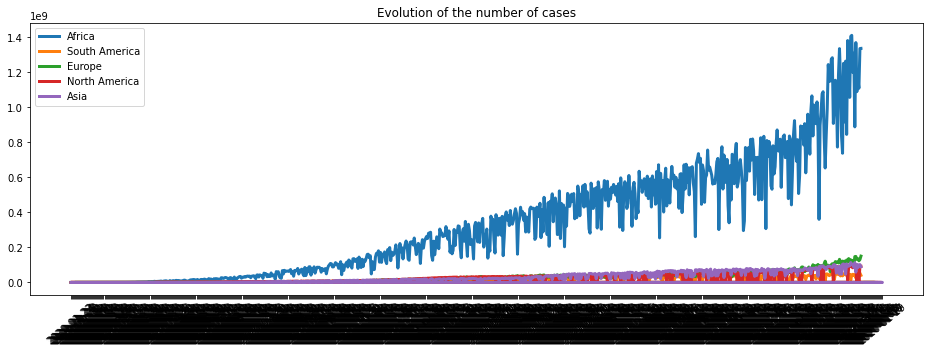

In [28]:
pltCountry_cases('Total_Cases','Africa','South America', 'Europe', 'North America', 'Asia')



In [29]:
sns.set(palette = 'Set1',style='darkgrid')
#Function for making a time serie on a designated country and plotting the rolled mean and standard 
def roll(country,case='Total_Cases'):
    ts=df.loc[(df['Continent']==country)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['Total_Cases']>=10)])
    ts=ts[-a:]
    return (ts.rolling(window=4,center=False).mean().dropna())


def rollPlot(country, case='Total_Cases'):
    ts=df.loc[(df['Continent']==country)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['Total_Cases']>=10)])
    ts=ts[-a:]
    plt.figure(figsize=(16,6))
    plt.plot(ts.rolling(window=7,center=False).mean().dropna(),label='Rolling Mean')
    plt.plot(ts[case])
    plt.plot(ts.rolling(window=7,center=False).std(),label='Rolling std')
    plt.legend()
    plt.title('Cases distribution in %s with rolling mean and standard' %country)
    plt.xticks([])

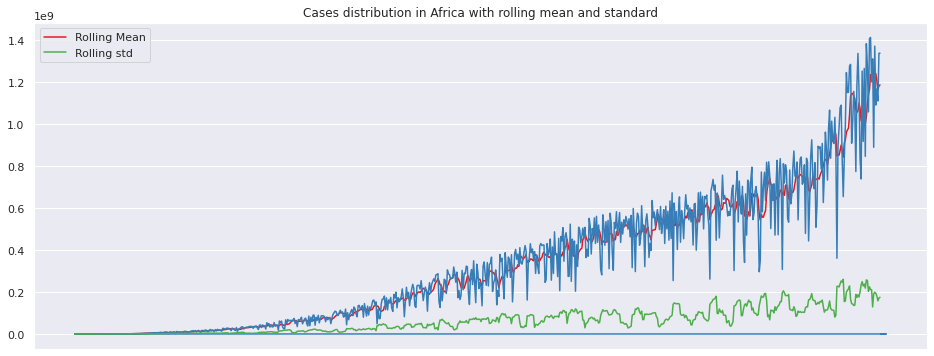

In [30]:
tsC1=roll('Africa')
rollPlot('Africa')

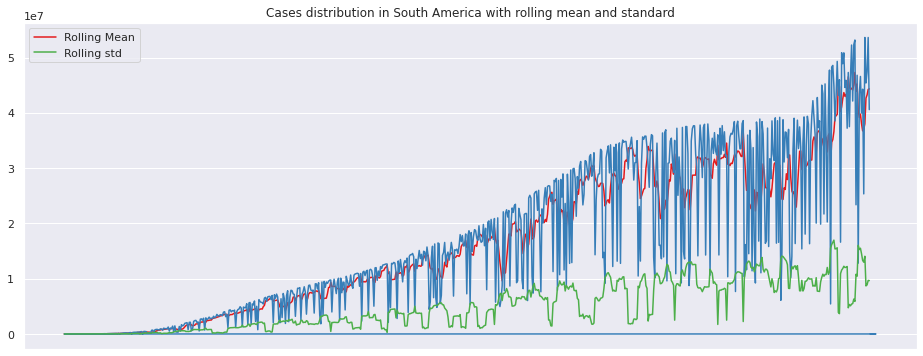

In [31]:
tsC2=roll('South America')
rollPlot('South America')

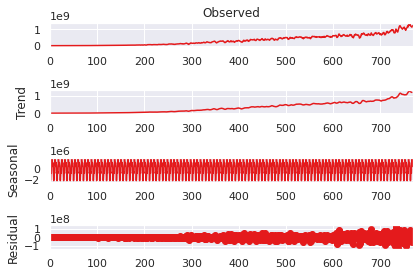

In [32]:
#Decomposing the ts to find its properties
fig=sm.tsa.seasonal_decompose(tsC1.values,freq=7).plot()

In [33]:
#Function to check the stationarity of the time serie using Dickey fuller test
def stationarity(ts):
    print('Results of Dickey-Fuller Test:')
    test = adfuller(ts, autolag='AIC')
    results = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for i,val in test[4].items():
        results['Critical Value (%s)'%i] = val
    print (results)

#For China
tsC=tsC1['Total_Cases'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                   5.227849
p-value                          1.000000
#Lags Used                      20.000000
Number of Observations Used    750.000000
Critical Value (1%)             -3.439099
Critical Value (5%)             -2.865401
Critical Value (10%)            -2.568826
dtype: float64


In [34]:
#For Africa
tsC=tsC2['Total_Cases'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                   0.742124
p-value                          0.990642
#Lags Used                      20.000000
Number of Observations Used    711.000000
Critical Value (1%)             -3.439581
Critical Value (5%)             -2.865614
Critical Value (10%)            -2.568939
dtype: float64


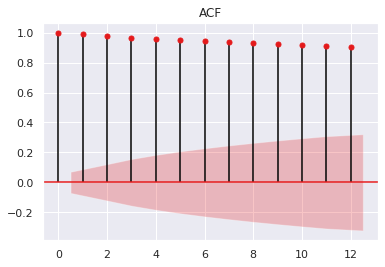

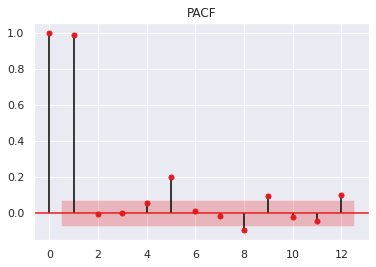

In [35]:
def corr(ts):
    plot_acf(ts,lags=12,title="ACF")
    plot_pacf(ts,lags=12,title="PACF")
    

#For Africa
corr(tsC1)

In [36]:
#test['Date'] = pd.to_datetime(test['Date'])
#train['Date'] = pd.to_datetime(train['Date'])
train = train.set_index(['Date'])
test = test.set_index(['Date'])

In [37]:
def create_features(df,label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['Date'] = df.index
    df['hour'] = df['Date'].dt.hour
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['quarter'] = df['Date'].dt.quarter
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['dayofmonth'] = df['Date'].dt.day
    df['weekofyear'] = df['Date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
   
    return X

In [44]:
train_features=pd.DataFrame(create_features(train), format='%Y-%m-%d %H:%M:%S')
test_features=pd.DataFrame(create_features(test))
features_and_target_train = pd.concat([train,train_features], axis=1)
features_and_target_test = pd.concat([test,test_features], axis=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def FunLabelEncoder(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            le.fit(df[c].astype(str))
            df[c] = le.transform(df[c].astype(str))
    return df
features_and_target_train= FunLabelEncoder(features_and_target_train)

AttributeError: ignored

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  621
Model:                 ARIMA(5, 1, 4)   Log Likelihood               -9656.178
Method:                       css-mle   S.D. of innovations        1360116.908
Date:                Thu, 09 Feb 2023   AIC                          19334.356
Time:                        05:27:42   BIC                          19383.100
Sample:                             1   HQIC                         19353.302
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.984e+04   1.96e+04      1.525      0.127   -8508.543    6.82e+04
ar.L1.D.y      0.0996      0.050      1.972      0.049       0.001       0.199
ar.L2.D.y      0.0475      0.048      0.997      0.3

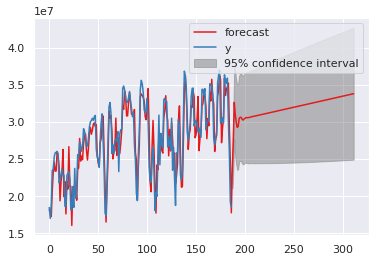

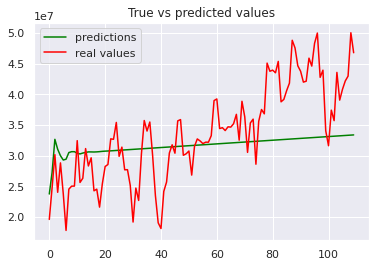

In [42]:
#Mean absolute percentage error
def mape(y1, y_pred): 
    y1, y_pred = np.array(y1), np.array(y_pred)
    return np.mean(np.abs((y1 - y_pred) / y1)) * 100

def split(ts):
    #splitting 85%/15% because of little amount of data
    size = int(len(ts) * 0.85)
    train= ts[:size]
    test = ts[size:]
    return(train,test)


#Arima modeling for ts
def arima(ts,test):
    p=d=q=range(0,6)
    a=99999
    pdq=list(itertools.product(p,d,q))
    
    #Determining the best parameters
    for var in pdq:
        try:
            model = ARIMA(ts, order=var)
            result = model.fit()

            if (result.aic<=a) :
                a=result.aic
                param=var
        except:
            continue
            
    #Modeling
    model = ARIMA(ts, order=param)
    result = model.fit()
    result.plot_predict(start=int(len(ts) * 0.7), end=int(len(ts) * 1.2))
    pred=result.forecast(steps=len(test))[0]
    #Plotting results
    f,ax=plt.subplots()
    plt.plot(pred,c='green', label= 'predictions')
    plt.plot(test, c='red',label='real values')
    plt.legend()
    plt.title('True vs predicted values')
    #Printing the error metrics
    print(result.summary())        
    
    print('\nMean absolute percentage error: %f'%mape(test,pred))
    return (pred)



train,test=split(tsC)
pred=arima(train,test)

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  621
Model:                 ARIMA(5, 1, 4)   Log Likelihood               -9656.178
Method:                       css-mle   S.D. of innovations        1360116.908
Date:                Thu, 09 Feb 2023   AIC                          19334.356
Time:                        05:29:00   BIC                          19383.100
Sample:                             1   HQIC                         19353.302
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.984e+04   1.96e+04      1.525      0.127   -8508.543    6.82e+04
ar.L1.D.y      0.0996      0.050      1.972      0.049       0.001       0.199
ar.L2.D.y      0.0475      0.048      0.997      0.3

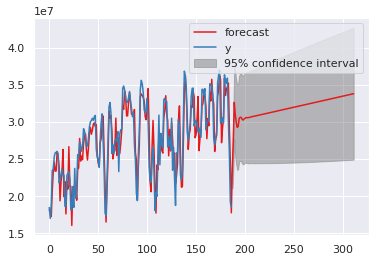

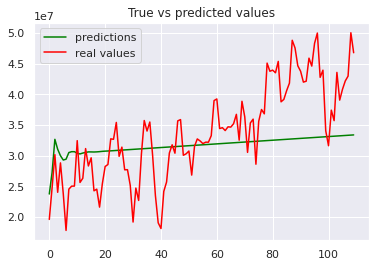

In [43]:
#Mean absolute percentage error
def mape(y2, y_pred): 
    y2, y_pred = np.array(y2), np.array(y_pred)
    return np.mean(np.abs((y2 - y_pred) / y2)) * 100

def split(ts):
    #splitting 85%/15% because of little amount of data
    size = int(len(ts) * 0.85)
    train= ts[:size]
    test = ts[size:]
    return(train,test)


#Arima modeling for ts
def arima(ts,test):
    p=d=q=range(0,6)
    a=99999
    pdq=list(itertools.product(p,d,q))
    
    #Determining the best parameters
    for var in pdq:
        try:
            model = ARIMA(ts, order=var)
            result = model.fit()

            if (result.aic<=a) :
                a=result.aic
                param=var
        except:
            continue
            
    #Modeling
    model = ARIMA(ts, order=param)
    result = model.fit()
    result.plot_predict(start=int(len(ts) * 0.7), end=int(len(ts) * 1.2))
    pred=result.forecast(steps=len(test))[0]
    #Plotting results
    f,ax=plt.subplots()
    plt.plot(pred,c='green', label= 'predictions')
    plt.plot(test, c='red',label='real values')
    plt.legend()
    plt.title('True vs predicted values')
    #Printing the error metrics
    print(result.summary())        
    
    print('\nMean absolute percentage error: %f'%mape(test,pred))
    return (pred)



train,test=split(tsC)
pred=arima(train,test)